# EE-550 - Mini-Project - Mathematical morphology in image processing - Practical

The _OpenCV_ library will be extensively used throughout this notebook as it provides with a very efficient implementation of the mathematical morphology operations.

In [1]:
import cv2

Some utility libraries :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Library for making fancy progress bars ;-)

## The four main operators of mathematical morphology

The following picture will be used as an example:

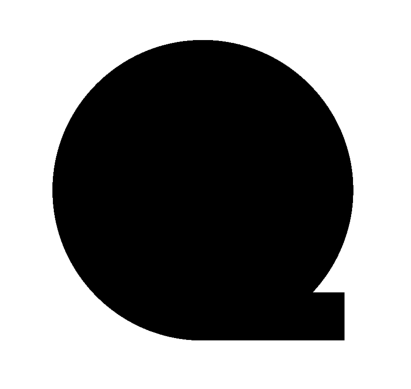

In [3]:
img = (cv2.imread('shape.png',0) < 200) * 255
img = img.astype(np.uint8)
plt.imshow(img, cmap = "binary")
plt.axis('off');

Let's define our structuring element:

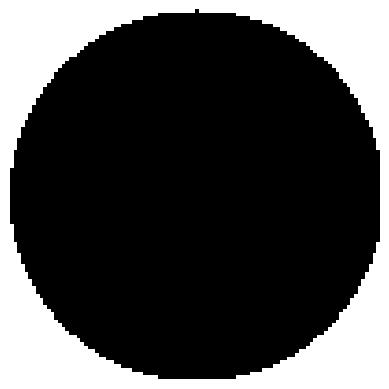

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,100))
plt.imshow(kernel, cmap = "binary")
plt.axis('off');

The four main operators are now tested:

### Erosion

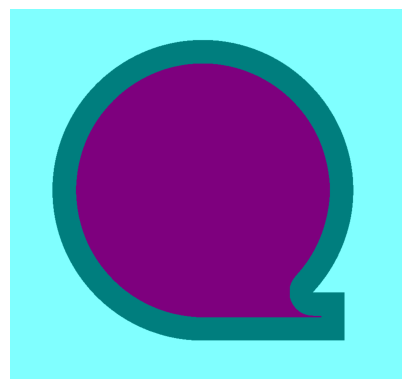

In [5]:
eroded = cv2.erode(img,kernel,iterations = 1)
plt.imshow(img, cmap = "binary")
plt.imshow(eroded, cmap = "cool",alpha=.5)
plt.axis('off');

### Dilation

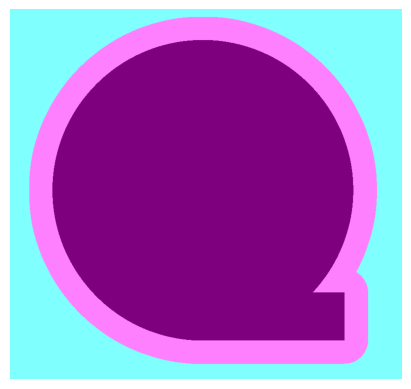

In [6]:
dilated = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(img, cmap = "binary")
plt.imshow(dilated, cmap = "cool",alpha=.5)
plt.axis('off');

### Opening

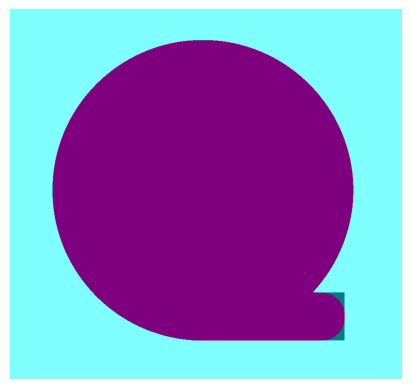

In [7]:
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(img, cmap = "binary")
plt.imshow(opened, cmap = "cool",alpha=.5)
plt.axis('off');

### Closing

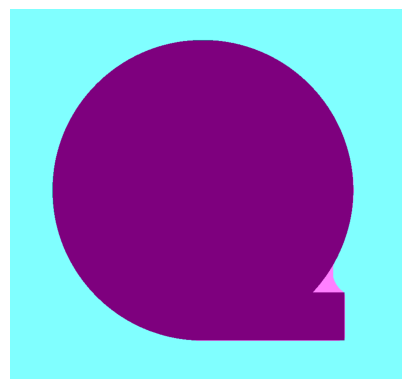

In [8]:
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img, cmap = "binary")
plt.imshow(closed, cmap = "cool",alpha=.5)
plt.axis('off');

## The morphological skeleton

Let us load another picture:

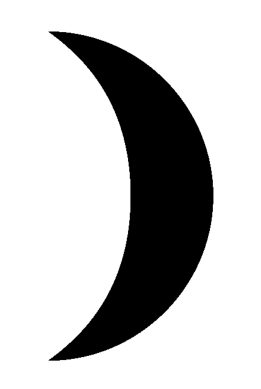

In [9]:
img = (cv2.imread('moon.png',0) < 200) * 255
img = img.astype(np.uint8)
plt.imshow(img, cmap = "binary")
plt.axis('off');

A few structuring elements are defined. Here, only one step is illustrated. It yields one part of the skeleton. Remember that the morphological skeleton is the union of the result of several morphological operations with different structuring elements. In order to compute other elements of the skeleton, edit the `erodsize` variable that sets the size of the structuring element. The `openkernel` structuring element should stay the same for each step. The size of the resulting element of skeleton depends on this structuring element. Its size is deliberatly set too high in order to see its effect. The `cleankernel` is used to clean the resulting skeleton element.

In [10]:
erodsize = 50
erodkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(erodsize,erodsize))

openkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
cleankernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,( 2, 2))

Let us apply the morphological skeleton formula :

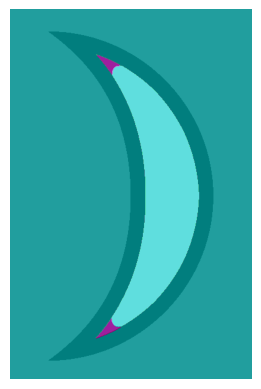

In [11]:
eroded = cv2.erode(img,erodkernel,iterations = 1)
opened = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, openkernel)

skeleton = eroded - opened

cleaned = cv2.morphologyEx(skeleton, cv2.MORPH_OPEN, cleankernel)

plt.imshow(img, cmap = "binary")
plt.imshow(eroded, cmap = "hot",alpha=.5)
plt.imshow(opened, cmap = "bone",alpha=0.5)
plt.imshow(cleaned, cmap = "cool", alpha=.5)
plt.axis('off');

## Granulometry

Let us operate on another picture:

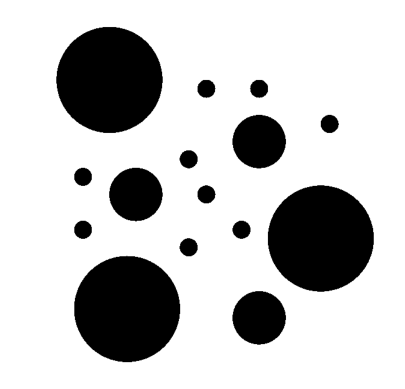

In [12]:
img = (cv2.imread('granulo.png',0) < 200) * 255
img = img.astype(np.uint8)
plt.imshow(img, cmap = "binary")
plt.axis('off');

The algorithm is now applied. Opening operations are applied to the picture with different structuring element sizes.

In [13]:
kernelsizes = np.arange(10,200,5)
areas = np.empty(kernelsizes.shape)

for s, kernelsize in enumerate(tqdm(kernelsizes)):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernelsize,kernelsize))
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    areas[s] = np.sum(opened)

100%|██████████| 38/38 [00:11<00:00,  3.27it/s]


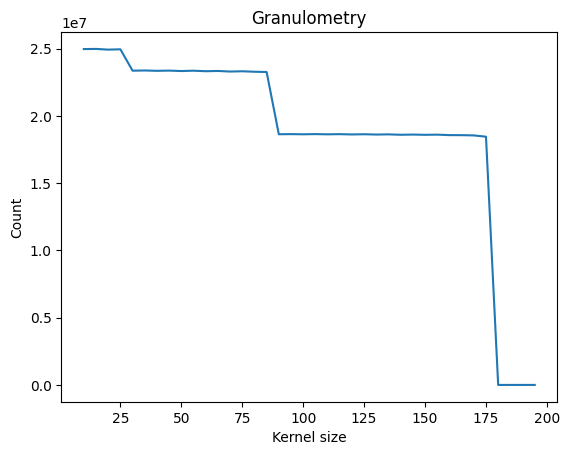

In [14]:
plt.plot(kernelsizes,areas)
plt.title("Granulometry")
plt.xlabel("Kernel size")
plt.ylabel("Count");

## Gradient & Laplacian

The gradient and Laplacian are now computed. Let us reload the same image:

In [15]:
img = (cv2.imread('granulo.png',0) < 200) * 255
img = img.astype(np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

eroded = cv2.erode(img,kernel,iterations = 1)
dilated = cv2.dilate(img,kernel,iterations = 1)

grad = dilated - eroded
lapl = dilated + eroded - 2*img

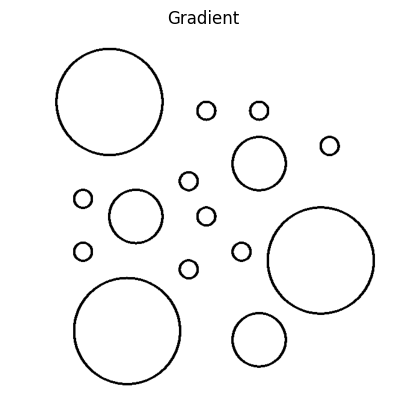

In [16]:
plt.imshow(grad, cmap = "binary")
plt.title("Gradient")
plt.axis('off');

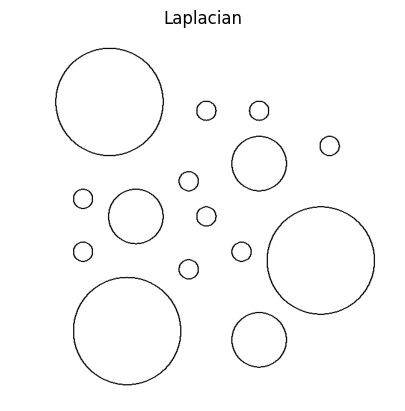

In [17]:
plt.imshow(lapl, cmap = "binary")
plt.title("Laplacian")
plt.axis('off');

## Cleaning

Opening can be used to clean a noisy picture by removing noise:

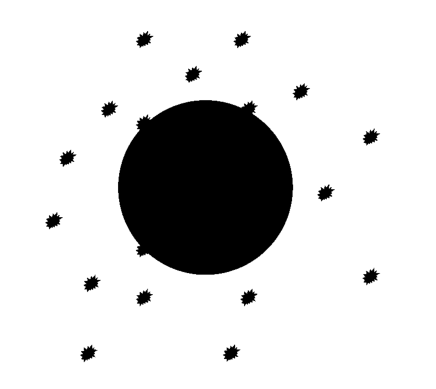

In [18]:
img = (cv2.imread('noise.png',0) < 200) * 255
img = img.astype(np.uint8)
plt.imshow(img, cmap = "binary")
plt.axis('off');

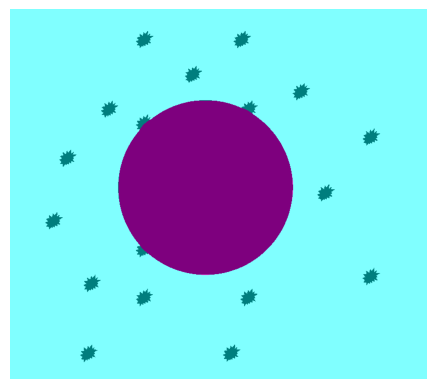

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,100))
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(img, cmap = "binary")
plt.imshow(opened, cmap = "cool",alpha=.5)
plt.axis('off');

Opening can be used to clean a noisy picture by filling noise:

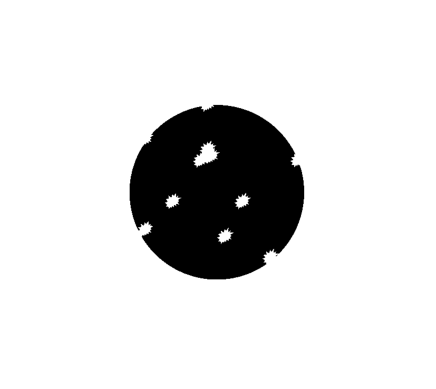

In [20]:
img = (cv2.imread('emmentaler.png',0) < 200) * 255
img = img.astype(np.uint8)
plt.imshow(img, cmap = "binary")
plt.axis('off');

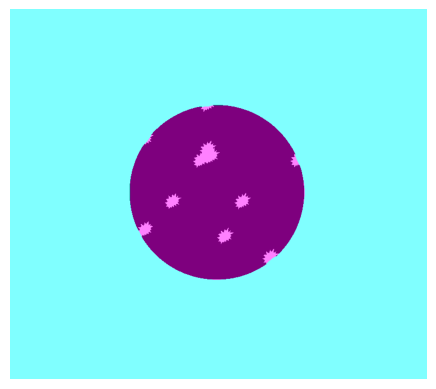

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,100))
opened = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img, cmap = "binary")
plt.imshow(opened, cmap = "cool",alpha=.5)
plt.axis('off');